<a href="https://colab.research.google.com/github/yosaphatprs/Quiz2_Machine-Learning_TI3F/blob/main/Quiz_2_Machine_Learning_Josafat_Pratama_Susilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 2 Machine Learning

Nama : Josafat Pratama Susilo

NIM  : 2141720031

Kelas : TI 3F

# Import Library

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [14]:
from tensorflow.keras.datasets import mnist

In [15]:
# Load data ke dalam 2 tipe variabel, yaitu train dan test. Masing-masing berupa tuple terdiri atas data dan labels.
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [16]:
# Menampilkan dimensi (jumlah layers, jumlah baris, jumlah kolom) objek train_data dan test_data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [17]:
# Menampilkan dimensi objek train_labels dan test_labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [18]:
# Menampilkan dimensi salah satu data pada train_data
train_data[0].shape

(28, 28)

In [19]:
# Menampilkan dimensi dari train_labels
train_labels.shape

(60000,)

### Combine Train and Test Data

In [20]:
# Kode dibawah berfungsi untuk menggabungkan masing-masing data dari data dan labels ke digits_data dan digits_labels
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [21]:
# Menampilkan dimensi dari digits_data
digits_data.shape

(70000, 28, 28)

In [22]:
# Menampilkan dimensi dari digits_labels
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 5')

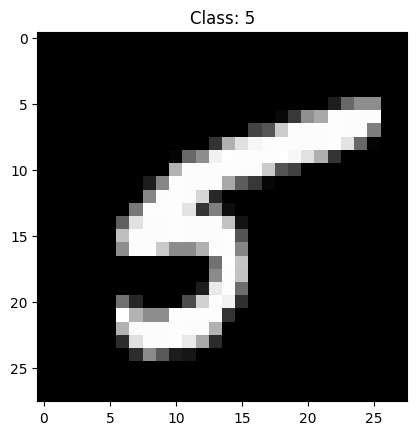

In [23]:
# Menampilkan data dan labelnya secara random.
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

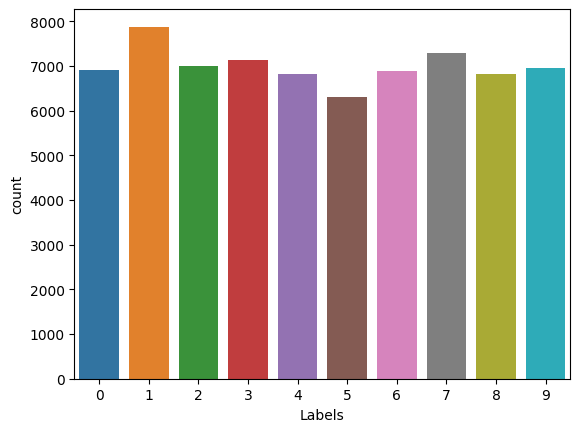

In [24]:
# Mengecek distribusi data labels pada dataset mnist
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [2]:
# Mendapatkan data Alfabet dari A sampai Z
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 16:37:43--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  95.5MB/s    in 1.9s    

2023-12-05 16:37:45 (95.5 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [5]:
# Ekstraksi file Zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [6]:
# Membaca file 'A_Z Handwritten Data.csv' dalam tipe float32, kemudian menampilkan preview dari hasil baca file tersebut
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Drop kolom 1 pada dataset_az, untuk mendapatkan hanya mendapatkan data piksel dari alfabet (slicing)
alphabet_data = dataset_az.drop('0', axis=1)
# Mendapatkan label saja dari dataset_az (slicing)
alphabet_labels = dataset_az['0']

In [8]:
# Menampilkan dimensi masing-masing data dan label
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [9]:
# Menampilkan dimensi label
alphabet_labels.shape

(372450,)

In [10]:
# Ubah dimensi piksel data sehingga menjadi 28x28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Menampilkan dimensi dari data, yang sebelumnya 784, menjadi 28x28
alphabet_data.shape

(372450, 28, 28)

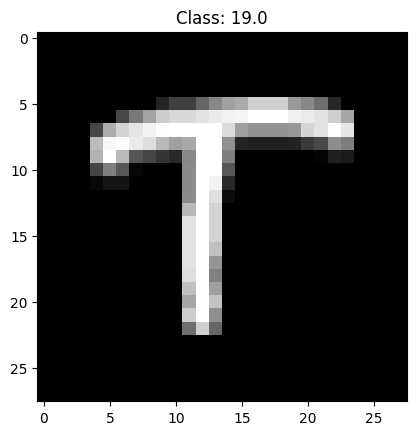

In [11]:
# Secara random, tampilkan data dan labels dari alfabet a sampai z
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

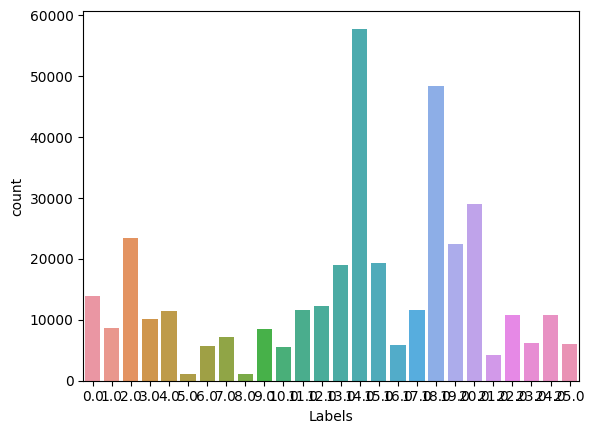

In [12]:
# Melakukan pengecekan distribusi data A-Z, dapat dilihat, distribusinya datasetnya tidak merata terdapat beberapa karakter yang dominan.
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [25]:
# Menampilkan data yang unik dalam digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
# Menampilkan data yang unik dalam digits_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [27]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

# Menambahkan 10 pada label alphabet, karena label angka ada 10 karakter

alphabet_labels += 10

In [28]:
# Menampilkan data yang unik dalam alphabet_labels
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [29]:
# Menggabungkan alphabet_data dan digits_data ke dalam dataset yang lebih besar yaitu data
# Menggabungkan alphabet_labels dan digits_labels ke dalam dataset yang lebih besar yaitu labels
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Menampilkan dimensi dari data dan labels
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Menampilkan data yang unik dalam labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Konversi array data ke dalam tipe float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Menambahkan depth ke dalam data karena convolutional memerlukan data berupa 3D, sedangkan data sementara berupa 2D
data = np.expand_dims(data, axis=-1)

# Menampilkan dimensi yang baru dari data, terlihat bahwa terdapat dimensi baru -> 28,28,1
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [ ]:
# Normalisasi data supaya lebih mudah ketika proses komputasi
data /= 255.0

In [ ]:
# Melakukan pengecekkan nilai maksimal data dan minimal data, untuk memastikan data berhasil dinormalisasi
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Encoding label
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Memapilkan dimensi dari label yang telah melalui proses encode
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

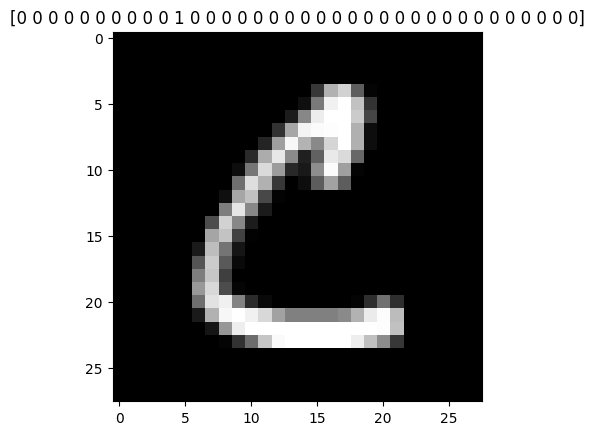

In [ ]:
# Melakukan pengecekkan data dengan label yang telah dibinerisasi
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Karena berdasarkan distribusi data yang tidak seimbang, maka diberi beban tambahan untuk data yang tergolong kecil
# Hitung data untuk masing-masing label terlebih dahulu
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Tampilkan jumlah maksimal
classes_total.max()

57825

In [ ]:
# Buat beban tambahan untuk masing-masing label
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Cek beban setiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [ ]:
# Split data untuk bagian train dan test dengan rasio train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Buat objek generator augmentasi gambar menggunakan ImageDataGenerator dalam yang ada dalam keras, tensorflow
# Rotation range = 10 berarti rentang acak rotasi dari gambar yang dibuat maksimal adalah 10
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Membuat model network CNN dengan optimizer adam
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Tampilkan informasi dari model yang telah dibuat
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Buat label
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Tampilkan label yang telah dibuat
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Tentukan nama model, jumlah epoch, dan ukuran batch dari model yang akan di train
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
# Atur checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Latih model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.1791 - accuracy: 0.8251
Epoch 1: val_loss improved from inf to 0.36160, saving model to custom_ocr.model
2765/2765 [==============================] - 147s 49ms/step - loss: 2.1791 - accuracy: 0.8251 - val_loss: 0.3616 - val_accuracy: 0.8454
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9938 - accuracy: 0.9009
Epoch 2: val_loss improved from 0.36160 to 0.26690, saving model to custom_ocr.model
2765/2765 [==============================] - 124s 45ms/step - loss: 0.9938 - accuracy: 0.9009 - val_loss: 0.2669 - val_accuracy: 0.8869
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8230 - accuracy: 0.9134
Epoch 3: val_loss improved from 0.26690 to 0.21988, saving model to custom_ocr.model
2765/2765 [==============================] - 149s 54ms/step - loss: 0.8229 - accuracy: 0.9134 - val_loss: 0.2199 - val_accuracy: 0.9165
Epoch 4/20
2765/2765 [=========================

# Evaluate Model

## Make a Single Prediction

In [ ]:
# Membuat prediksi menggunakan model yang telah dibuat
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [ ]:
# Prediksi data-0, akan terdapat probability untuk masing-masing label, probability paling tinggi adalah prediksi
predictions[1]

array([4.5942157e-20, 4.7150628e-10, 1.6123050e-14, 3.8629519e-20,
       4.7106953e-17, 9.1196844e-15, 1.0679979e-15, 2.9810772e-11,
       2.7365704e-19, 9.7920663e-21, 3.6570519e-18, 6.8307189e-15,
       3.1195644e-14, 6.7112084e-12, 1.7621228e-13, 2.6869576e-13,
       3.7636003e-15, 4.8104268e-17, 9.9996698e-01, 3.3033699e-05,
       1.4655101e-15, 1.0002723e-11, 4.5838198e-19, 6.1933137e-19,
       1.3994970e-14, 4.2502771e-16, 3.1570784e-17, 1.5354576e-19,
       1.0077268e-12, 3.5405254e-09, 4.7982107e-10, 1.0462218e-17,
       1.7871722e-26, 3.3963392e-14, 9.9080568e-14, 5.0301169e-12],
      dtype=float32)

In [ ]:
# Tampilkan probability paling tinggi dari prediksi yang telah dibuat
np.argmax(predictions[1])

18

In [ ]:
# Cek label 18
name_labels[18]

'I'

In [ ]:
# Cek y-test untuk angka 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Tampilkan probability paling tinggi dari prediksi yang telah dibuat
np.argmax(y_test[1])

18

In [ ]:
# Cek label
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [ ]:
# Evaluasi model yang telah dibuat
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 4ms/step - loss: 0.1656 - accuracy: 0.9361


[0.16561944782733917, 0.9360944628715515]

In [ ]:
# Tampilkan klasifikasi
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.28      0.77      0.41      1381
           1       0.97      0.99      0.98      1575
           2       0.87      0.98      0.92      1398
           3       0.95      0.99      0.97      1428
           4       0.93      0.97      0.95      1365
           5       0.67      0.93      0.78      1263
           6       0.93      0.98      0.95      1375
           7       0.95      0.98      0.97      1459
           8       0.89      0.99      0.94      1365
           9       0.97      0.97      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.98      1734
           C       0.99      0.97      0.98      4682
           D       0.89      0.97      0.93      2027
           E       0.98      0.99      0.99      2288
           F       0.96      0.99      0.98       233
           G       0.94      0.94      0.94      1152
           H       0.98    

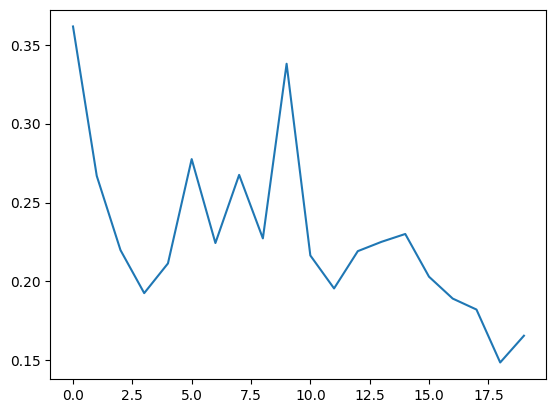

In [ ]:
# Visualisasi loss untuk setiap epoch yang dilakukan
plt.plot(history.history['val_loss'])

In [ ]:
# Cek metrics lain
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

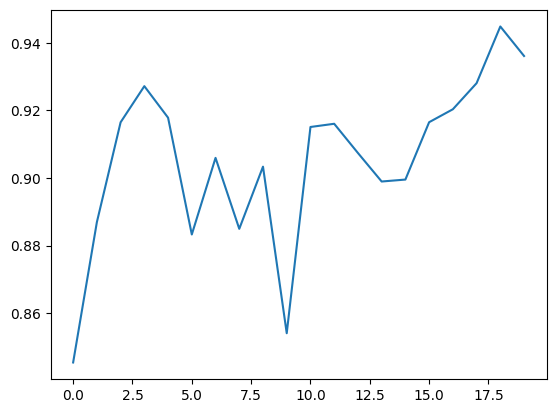

In [ ]:
# Cek performa model dengan menggunakan akurasi validasi (val_accuracy)
plt.plot(history.history['val_accuracy'])

# Save The Model

In [ ]:
# Menyimpan model dalam format h5 ke dalam google colab
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model

In [ ]:
# Memuat model yang telah disimpan sebelumnya dengan nama network
load_network = load_model('network')

In [ ]:
# Menampilkan informasi dari load_network
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

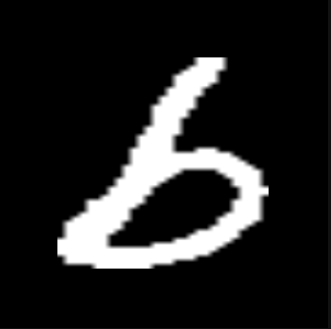

In [68]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [69]:
# Menampilkan dimensi dari img
img.shape

(329, 331, 3)

In [70]:
# Konversi gambar ke dalam grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menampilkan dimensi dari img yang telah melalui proses grayscaling
gray_img.shape

(329, 331)

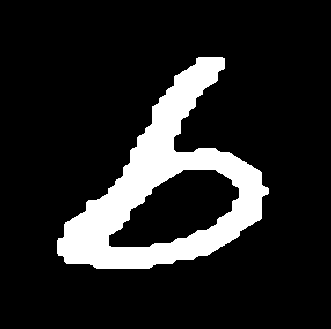

120.0


In [71]:
# Pre-process
# Proses thresholding dengan metode binary dan otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan gambar
cv2_imshow(thresh)

# Menampilkan nilai dari threshold
print(value)

In [72]:
# Ubah dimensi gambar supaya sesuai dengan dimensi input dari model yang telah dibuat yaitu 28x28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [73]:
# Konversi menjadi float32
# dan tambahkan dimensi baru karena dimensi input dari model juga berupa 3D
img_input = img_resize.astype('float32') / 255 # Lakukan normalisasi di sini
img_input = np.expand_dims(img_input, axis=-1) # Tambahkan depth (dimensi baru)

# Tampilkan dimensi dari img_input
img_input.shape

(28, 28, 1)

In [74]:
# Tambahkan banyaknya data sebagai dimensi baru
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [75]:
# Prediksi gambar
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) hasil prediksi
pred_label

1/1 [==============================] - 0s 214ms/step


6

In [76]:
# check label for 6
name_labels[6]

'6'

## Analisis Hasil

Hasil dari tes diatas, huruf b belum dapat diprediksi secara akurat. Hal ini dikarenakan menurut saya, citra huruf b tersebut masih perlu dilakukan pre-processing terlebih dahulu untuk melakukan perbaikan pada skew huruf tersebut sehingga lebih menyerupai huruf b daripada angka 6.